# Sunspots Time Series
 ### LinhDan Nguyen & Eric Ma

## Import the necessary libraries

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

In [267]:
df = pd.read_csv('monthly-sunspots.csv')
df.head()

Month  Sunspots
0  1749-01      58.0
1  1749-02      62.6
2  1749-03      70.0
3  1749-04      55.7
4  1749-05      85.0

In [268]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index('Month')

In [269]:
df.isna().sum()

Sunspots    0
dtype: int64

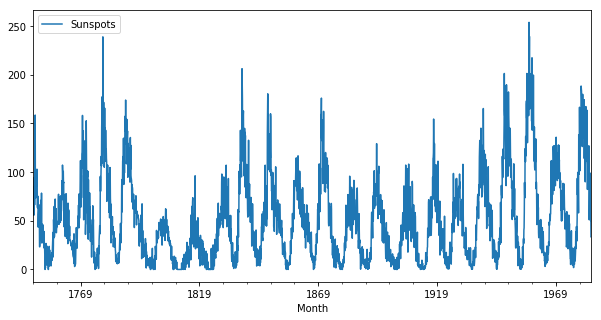

In [270]:
df.plot(figsize = (10,5))
plt.show()

In [271]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 132, center = False).mean()
    rolstd = TS.rolling(window = 132, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS, autolag = 'AIC') # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

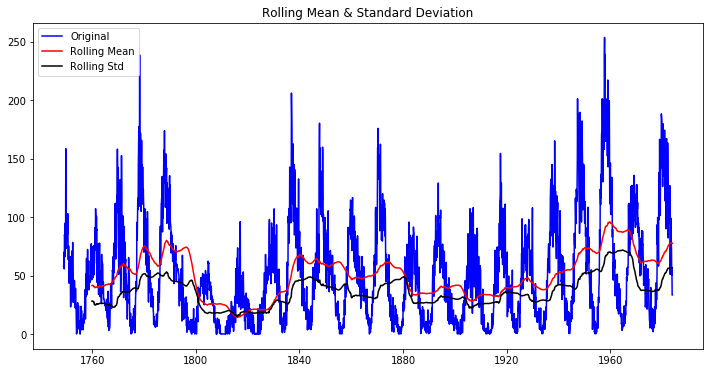

Results of Dickey-Fuller Test:
Test Statistic                -9.567668e+00
p-value                        2.333452e-16
#Lags Used                     2.700000e+01
Number of Observations Used    2.792000e+03
Critical Value (1%)           -3.432694e+00
Critical Value (5%)           -2.862576e+00
Critical Value (10%)          -2.567321e+00
dtype: float64


In [272]:
stationarity_check(df.Sunspots)

## Decomposition

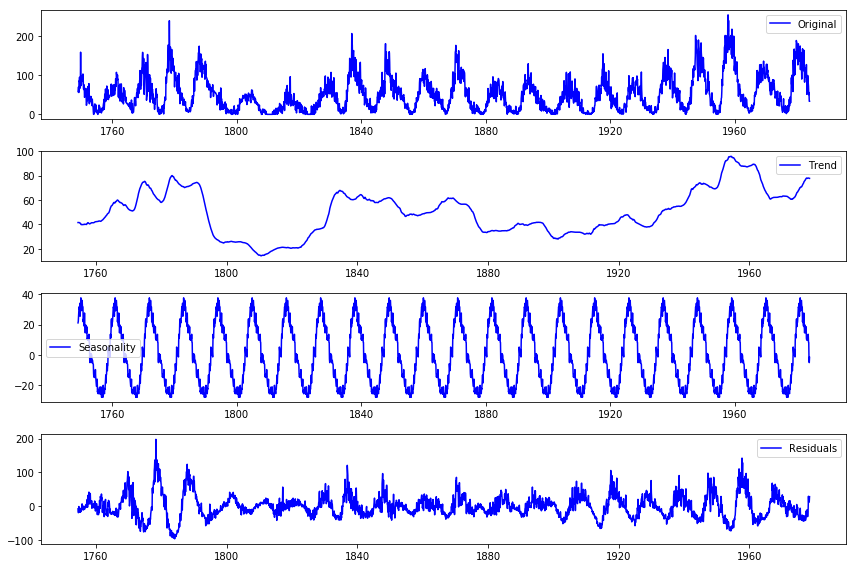

In [273]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.Sunspots.dropna(), freq = 132)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

## ACF & PACF

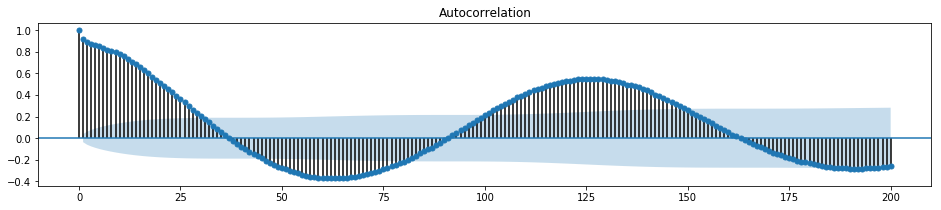

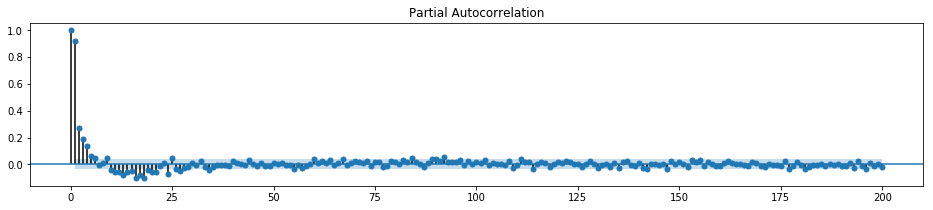

In [274]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(df.Sunspots,ax=ax, lags = 200);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(df.Sunspots,ax=ax, lags = 200);

In [275]:
df_test = df.copy()

In [276]:
train = df_test.iloc[:int(len(df)*0.8)]

In [277]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an AR(1) model to the first simulated data
mod_arma = ARMA(train.Sunspots, order=(1,0,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:               Sunspots   No. Observations:                 2256
Model:                     ARMA(1, 0)   Log Likelihood               -9455.359
Method:                       css-mle   S.D. of innovations             15.989
Date:                Mon, 15 Jul 2019   AIC                          18916.718
Time:                        14:50:29   BIC                          18933.882
Sample:                    01-01-1749   HQIC                         18922.982
                         - 12-01-1936                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             45.0436      3.475     12.964      0.000      38.234      51.854
ar.L1.Sunspots     0.9035      0.009     99.998      0.000       0.886       0.921
                                    

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [281]:
# assuming your time series are stored in an object "series"
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

mod_arima = ARIMA(train['Sunspots'], order=(1,0,2))
res_arima = mod_arima.fit()

# Print out summary information on the fit
print(res_arima.summary())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               Sunspots   No. Observations:                 2256
Model:                     ARMA(1, 2)   Log Likelihood               -9294.107
Method:                       css-mle   S.D. of innovations             14.885
Date:                Mon, 15 Jul 2019   AIC                          18598.214
Time:                        14:51:37   BIC                          18626.821
Sample:                    01-01-1749   HQIC                         18608.654
                         - 12-01-1936                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             46.3948      7.503      6.183      0.000      31.689      61.101
ar.L1.Sunspots     0.9810      0.004    221.651      0.000       0.972       0.990
ma.L1.Sunspots    -0.4262      0.021

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


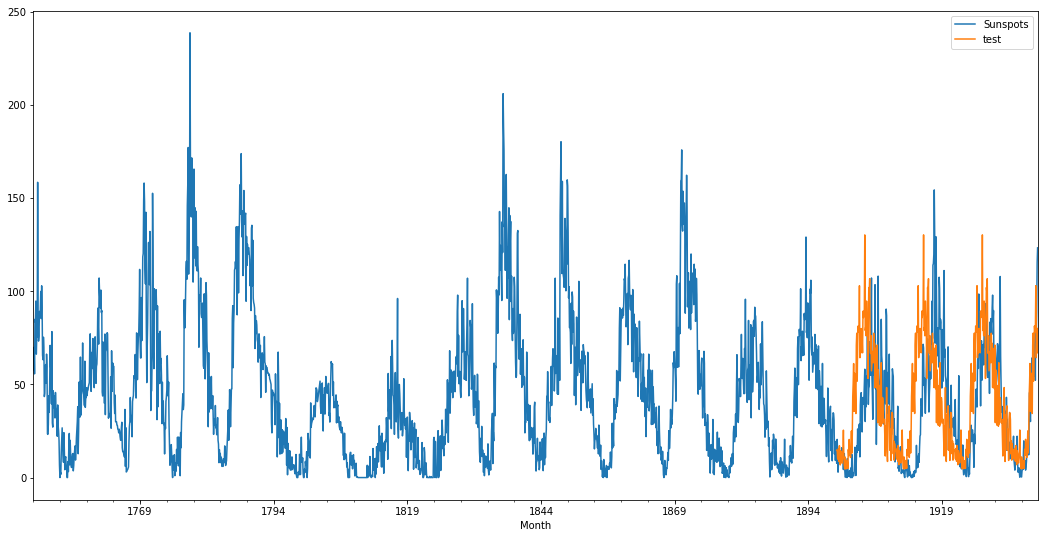

In [279]:
train['test']=  res.predict(start = int(len(train)*0.8), end = len(train), dynamic=True, typ = 'levels' )
train[['Sunspots', 'test']].plot(figsize = (18,9))

In [227]:
mod =  sm.tsa.statespace.SARIMAX(df['Sunspots'], trend = 'n', order = (1,0,2), seasonal_order=(0,1,0,132))
res = mod.fit()
print(res.summary())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                  Statespace Model Results                                 
Dep. Variable:                            Sunspots   No. Observations:                 2820
Model:             SARIMAX(1, 0, 2)x(0, 1, 0, 132)   Log Likelihood              -12054.752
Date:                             Mon, 15 Jul 2019   AIC                          24117.504
Time:                                     14:07:47   BIC                          24141.090
Sample:                                 01-01-1749   HQIC                         24126.036
                                      - 12-01-1983                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9701      0.004    226.109      0.000       0.962       0.978
ma.L1         -0.4283      

In [228]:
forecast = res.forecast('2010-01')

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [229]:
forecast

1984-01-01    35.355335
1984-02-01    36.092012
1984-03-01    39.395661
1984-04-01    51.293218
1984-05-01    36.184865
1984-06-01    33.470779
1984-07-01    17.251132
1984-08-01    19.926090
1984-09-01    53.795815
1984-10-01    25.360463
1984-11-01    18.720185
1984-12-01    18.275130
1985-01-01    22.725440
1985-02-01    21.271253
1985-03-01    16.712705
1985-04-01    35.849926
1985-05-01    35.183041
1985-06-01    31.812175
1985-07-01    51.737446
1985-08-01    29.658970
1985-09-01    36.376859
1985-10-01    43.391221
1985-11-01    21.402163
1985-12-01    17.009785
1986-01-01    15.514189
1986-02-01     8.215469
1986-03-01     8.313720
1986-04-01     2.009031
1986-05-01     6.001492
1986-06-01     8.491187
                ...    
2007-08-01    29.586121
2007-09-01    36.306189
2007-10-01    43.322665
2007-11-01    21.335657
2007-12-01    16.945269
2008-01-01    15.451603
2008-02-01     8.154755
2008-03-01     8.254822
2008-04-01     1.951896
2008-05-01     5.946065
2008-06-01     8

In [230]:
forecast_df_1 = pd.concat([df,forecast])

In [231]:
forecast_df_1

Sunspots          0
1749-01-01      58.0        NaN
1749-02-01      62.6        NaN
1749-03-01      70.0        NaN
1749-04-01      55.7        NaN
1749-05-01      85.0        NaN
1749-06-01      83.5        NaN
1749-07-01      94.8        NaN
1749-08-01      66.3        NaN
1749-09-01      75.9        NaN
1749-10-01      75.5        NaN
1749-11-01     158.6        NaN
1749-12-01      85.2        NaN
1750-01-01      73.3        NaN
1750-02-01      75.9        NaN
1750-03-01      89.2        NaN
1750-04-01      88.3        NaN
1750-05-01      90.0        NaN
1750-06-01     100.0        NaN
1750-07-01      85.4        NaN
1750-08-01     103.0        NaN
1750-09-01      91.2        NaN
1750-10-01      65.7        NaN
1750-11-01      63.3        NaN
1750-12-01      75.4        NaN
1751-01-01      70.0        NaN
1751-02-01      43.5        NaN
1751-03-01      45.3        NaN
1751-04-01      56.4        NaN
1751-05-01      60.7        NaN
1751-06-01      50.7        NaN
...              ...        ...
2007-08-01       NaN  29.586121
2007-09-01       NaN  36.306189
2007-10-01       NaN  43.322665
2007-11-01       NaN  21.335657
2007-12-01       NaN  16.945269
2008-01-01       NaN  15.451603
2008-02-01       NaN   8.154755
2008-03-01       NaN   8.254822
2008-04-01       NaN   1.951896
2008-05-01       NaN   5.946065
2008-06-01       NaN   8.437418
2008-07-01       NaN  25.326038
2008-08-01       NaN  36.912008
2008-09-01       NaN  11.195405
2008-10-01       NaN   6.476308
2008-11-01       NaN  16.854791
2008-12-01       NaN   5.330927
2009-01-01       NaN   5.704784
2009-02-01       NaN   1.976433
2009-03-01       NaN  19.645938
2009-04-01       NaN  16.613364
2009-05-01       NaN  10.278773
2009-06-01       NaN  10.142226
2009-07-01       NaN  -0.096219
2009-08-01       NaN  14.463494
2009-09-01       NaN  11.621421
2009-10-01       NaN  18.777615
2009-11-01       NaN   3.432128
2009-12-01       NaN  13.585011
2010-01-01       NaN  14.736312

[3133 rows x 2 columns]

In [232]:
forecast_df_1.columns

Index(['Sunspots', 0], dtype='object')

In [234]:
forecast_df_1.rename(columns={0:'Forecast'}, inplace = True)

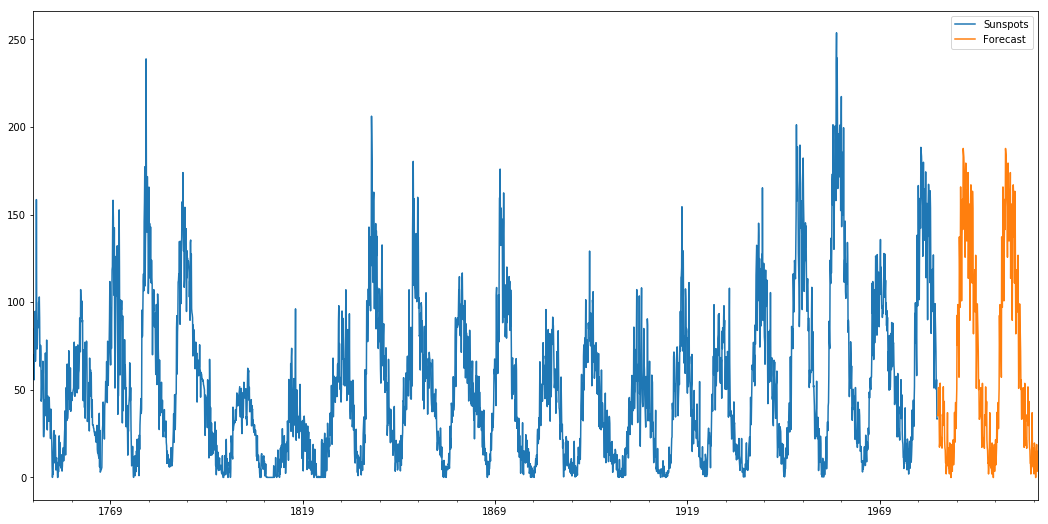

In [235]:
forecast_df_1[['Sunspots','Forecast']].plot(figsize = (18,9))

In [241]:
first_diff = df.Sunspots - df.Sunspots.shift(1)
first_diff = first_diff.dropna()

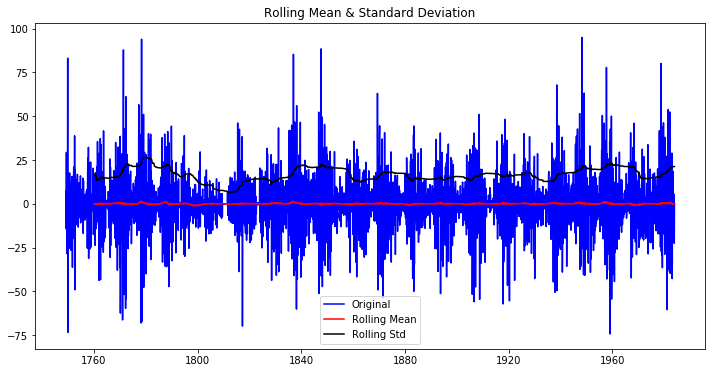

Results of Dickey-Fuller Test:
Test Statistic                -8.647591e+00
p-value                        5.219691e-14
#Lags Used                     2.300000e+01
Number of Observations Used    2.795000e+03
Critical Value (1%)           -3.432692e+00
Critical Value (5%)           -2.862575e+00
Critical Value (10%)          -2.567321e+00
dtype: float64


In [242]:
stationarity_check(first_diff)

In [247]:
train = pd.DataFrame(first_diff.iloc[:int(len(df)*0.8)])

In [255]:
from statsmodels.tsa.arima_model import ARIMA

In [259]:
# Fit an AR(1) model to the first simulated data
mod_arima = ARIMA(train.Sunspots, order=(1,1,2))
res_arima = mod_arima.fit()

# Print out summary information on the fit
print(res_arima.summary())

# Print out the estimate for the constant and for theta
print(res_arima.params)

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.